In [165]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import matplotlib
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [166]:
df = pd.read_excel(r'D:\tableau\Sample - Superstore.xls', sheet_name= 'Orders')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [168]:
df = df[['Order Date','Sales']]

In [169]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()
df = df.set_index('Order Date')

In [126]:
df.head(3)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536


In [98]:
df = df['Sales'].resample('MS').mean()

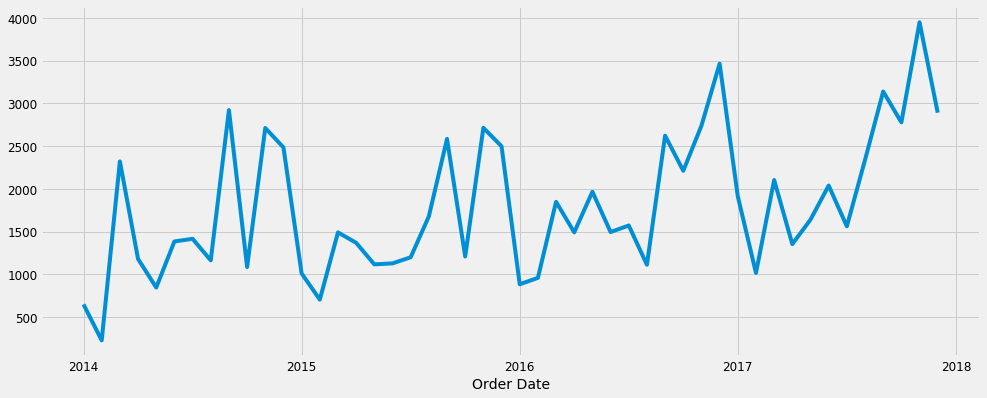

In [88]:
df.plot(figsize=(15, 6))
plt.show()

## SARIMA

In [57]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [58]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity= True,
                                            enforce_invertibility= True)
            results1 = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:866.413078687674
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:557.432695999859
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:558.4992624875346
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:834.9455898733024
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:558.6298584750563
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:558.7298880739053
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:777.6659694523161
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:560.4319258844171
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:759.4332034428087
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:552.7302203658883
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:763.4602945751668
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:542.6939878722411
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:736.9089771523896
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:535.2224202420367
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:795.1207924292137
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:558.3146126810229
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:557.7872682594514
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:769.0398735723452
ARIMA(1, 1, 

In [60]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity= False,
                                            enforce_invertibility= False)
            results2 = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results2.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:849.2964734613764
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1526.4420188499137
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:542.5524077991603
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:556.403053968139
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1314.1611834717257
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:379.31311116746053
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:800.9546615001095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3252.757368391807
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:528.8097917495901
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:558.3100439192094
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:220838659.43149534
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:378.6443983832901
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:761.9496656228289
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1404.2050552426888
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:545.436757111637
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:549.6307002149173
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1440.2375735299968
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:367.6372959140954
ARIMA(

In [61]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.408     -0.070      0.944      -0.828       0.771
ma.L1         -1.0227      0.828     -1.235      0.217      -2.646       0.600
ar.S.L12      -0.4943      0.235     -2.105      0.035      -0.955      -0.034
sigma2      2.153e+05   2.47e+05      0.873      0.383   -2.68e+05    6.98e+05


In [59]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results1 = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.408     -0.070      0.944      -0.828       0.771
ma.L1         -1.0227      0.828     -1.235      0.217      -2.646       0.600
ar.S.L12      -0.4943      0.235     -2.105      0.035      -0.955      -0.034
sigma2      2.153e+05   2.47e+05      0.873      0.383   -2.68e+05    6.98e+05


### for enforce_stationarity = True and enforce_invertibility = True

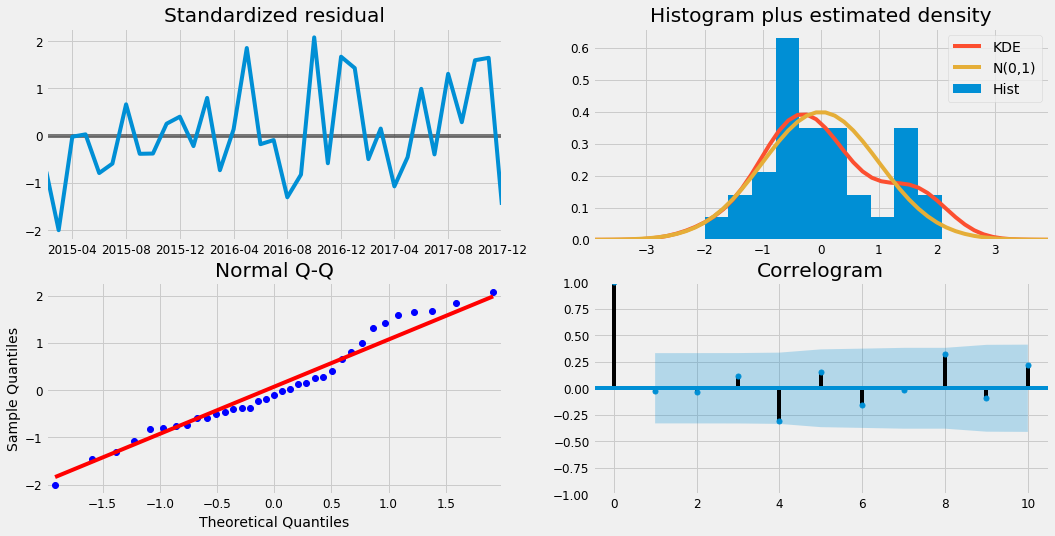

In [62]:
results1.plot_diagnostics(figsize=(16, 8))
plt.show()

### for enforce_stationarity = False and enforce_invertibility = False

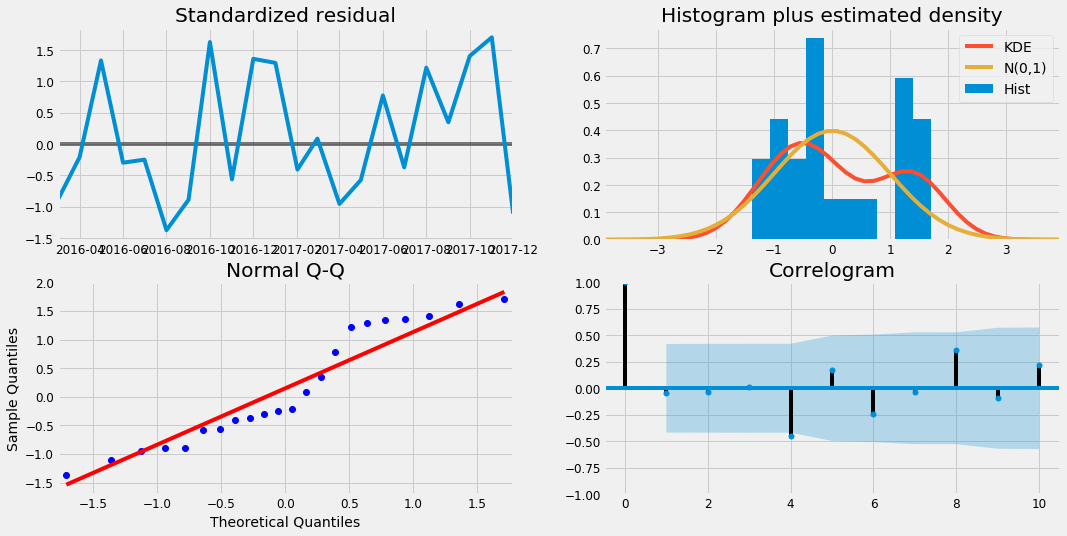

In [63]:
results2.plot_diagnostics(figsize=(16, 8))
plt.show()

In [65]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

y_forecasted = pred.predicted_mean
y_truth = df['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 223875.57


In [66]:
# from fbprophet import Prophet

In [148]:
# df_pro = df.reset_index()

In [149]:
# prophet_model = Prophet(interval_width=0.95)
# df_pro = df_pro.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [150]:
# df_pro.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [151]:
# result_pro= prophet_model.fit(df_pro)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [162]:
# future = result_pro.make_future_dataframe(periods= 365)

In [173]:
# forecast = result_pro.predict(future)